# Tutorial 2

In [2]:
import pandas as pd
import numpy as np
import re

## Dataset: Liverpool

### Task 1.1

In [4]:
data1 = pd.read_csv("liverpool_2223_season.csv")

### Task 1.2

{'Mon': 7, 'Tue': 1, 'Wed': 5, 'Thu': 0, 'Fri': 1, 'Sat': 17, 'Sun': 7}


<Axes: xlabel='Day'>

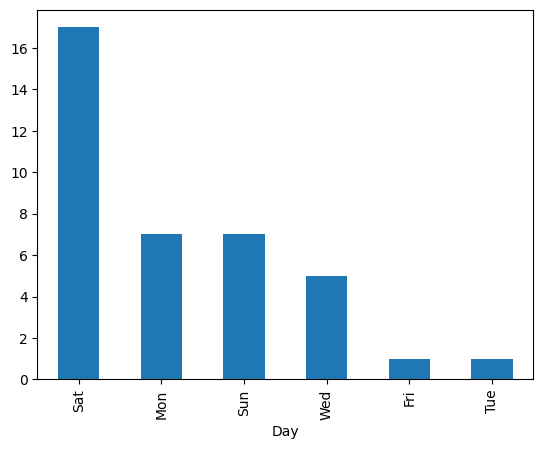

In [6]:
day = data1["Day"]

# using for loop
count = {"Mon":0, "Tue":0, "Wed":0, "Thu":0, "Fri":0, "Sat":0, "Sun":0}
for d in day:
    count[d] = count[d] + 1
print(count)

# using padans method
day = pd.Series.value_counts(day)

# use a singal line to print!
data1.Day.value_counts()

# bar plot
day.plot(kind="bar")

### Task 1.3

In [ ]:

# points = np.array(data1["GF"] - data1["GA"])
# result = np.where(points > 0, "W", np.where(points == 0, "D", "L"))
# pts = np.where(points > 0, 3, np.where(points == 0, 1, 0))
# np.array(np.hstack([np.matrix(data1), np.matrix(result).T, np.matrix(pts).T]))
points = data1["GF"] - data1["GA"]
data1['result'] = points.map(lambda x: 'W' if x > 0 else ('D' if x == 0 else 'L'))
data1['pts'] = points.map(lambda x: 3 if x > 0 else (1 if x == 0 else 0))
data1

In [18]:
# method: iterrows -> (index, rowdata)
type(data1.iterrows())
df = pd.DataFrame([[1, 1.5],[2, 0]], columns=['int', 'float'])
print(df)
_, row = next(df.iterrows())
print(row)

   int  float
0    1    1.5
1    2    0.0
int      1.0
float    1.5
Name: 0, dtype: float64


In [20]:
# solution 2

result = []
pts = []

for _,y in data1.iterrows():
    if y.GF > y.GA:
        result.append('W')
        pts.append(3)
    elif y.GF == y.GA:
        result.append('D')
        pts.append(1)
    else:
        result.append('L')
        pts.append(0)

data1['result'] = result
data1['pts'] = pts

### Task 1.4

In [ ]:
count = {}
Opponent = data1["Opponent"]

for i in range(data1.shape[0]):
    if count.get(Opponent[i]) == None:
        count[Opponent[i]] = 0
    if data1['pts'][i] == 3:
        count[Opponent[i]] += 1

for k in count.keys():
    print(f"Points against {k}: {count[k]}")



### Task 1.5

In [ ]:
acc = []
for i in range(data1.shape[0]):
    if i == 0: 
        acc.append(data1['pts'][i])
    else:
        acc.append(acc[i-1] + data1['pts'][i])
data1['acc'] = acc
data1

data1['accum'] = data1['pts'].cumsum()
np.where(data1['accum'] > 40)

In [25]:
# solution 2
# cumsum(axis=None, skipna=True, *args, **kwargs) -> Return cumulative sum over a DataFrame or Series axis.
data1['cumul_pts'] = data1.pts.cumsum()
data1.pts.cumsum()
id = np.where(data1.cumul_pts >= 40) # -> index of all cumul_pts >= 40
data1.iloc[id[0], ].head(1) # -> the first row >= 40

,Date,Day,Venue,GF,GA,Opponent,result,pts,cumul_pts
24,2023-03-05,Sun,Home,7,0,Manchester Utd,W,3,42


### Task 1.6
Use the internet to figure out what this function does. Then use it to compute the length of the longest winning streak that Liverpool had.

```Python
import re
def fn1(str1):
    out_string = re.split('[LD]+', str1)
    st1 = [len(x) for x in out_string]
    return st1
rle_out = fn1(liv.result.str.cat())
np.max(rle_out)
```

In [ ]:
import pdb
#pdb.set_trace()
def fn1(str):
    out_string = re.split('[LD]+', str)
    st1 = [len(x) for x in out_string]
    return st1

"""
str = ""
for i in range(data1.shape[0]):
    str += data1.result[i]
rle_out = fn1(str)
"""
rle_out = fn1(data1.result.str.cat())

np.max(rle_out)

### Task 1.7

In [ ]:
# The first 10 rows
data1.iloc[0:10]

In [ ]:
# Alternate rows from the first 10 rows, starting with the first.
data1[:10:2]

In [27]:
# Every alternate row, and columns Date, Venue, GF, GA and result.
data1.iloc[0:10:2][['Date', 'Venue', 'GF', 'GA', 'result']]
data1.iloc[0::2, [0, 2, 3, 4]]

,Date,Venue,GF,GA
0,2022-08-06,Away,2,2
2,2022-08-22,Away,1,2
4,2022-08-31,Home,2,1
6,2022-10-01,Home,3,3
8,2022-10-16,Home,1,0
10,2022-10-22,Away,0,1
12,2022-11-06,Away,2,1
14,2022-12-26,Away,3,1
16,2023-01-02,Away,1,3
18,2023-01-21,Home,0,0


In [26]:
# The last 5 rows.
data1.iloc[-5:,:]

,Date,Day,Venue,GF,GA,Opponent,result,pts,cumul_pts
33,2023-05-03,Wed,Home,1,0,Fulham,W,3,59
34,2023-05-06,Sat,Home,1,0,Brentford,W,3,62
35,2023-05-15,Mon,Away,3,0,Leicester City,W,3,65
36,2023-05-20,Sat,Home,1,1,Aston Villa,D,1,66
37,2023-05-28,Sun,Away,4,4,Southampton,D,1,67


In [ ]:
# All rows in reverse order.
data1.iloc[::-1]

## Truncated Poisson

In [ ]:
y_values = np.array([1, 2, 3, 5])
y_freq = np.array([12, 14, 3, 1])

y_bar = np.sum(y_values * y_freq) / np.sum(y_freq)

def lambda_mle(lambda_est):
    return lambda_est / (1 - np.exp(-lambda_est))

lambda_est = np.arange(0.5, 2.01, 0.01)
diff = np.abs(lambda_mle(lambda_est) - y_bar)

mle = lambda_est[np.argmin(diff)]

mle
